In [101]:
library("data.table")
library("qtl")

# import wbindivid_allmrk
load('../scripts/20210113_rqtl_wbindivids_allmarkers.Rdata')

# import wbindivid_allmrk
#load('../scripts/20210113_rqtl_all_individs_wahlberg_markers.Rdata')


# import wbindivid_allmrk
#load('../scripts/20210113_rqtl_WBindivids_WBmarkers.Rdata')

In [102]:
summary(datf2.5)

    F2 intercross

    No. individuals:    822 

    No. phenotypes:     4 
    Percent phenotyped: 100 93.4 100 100 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1058 
    No. markers:        198 150 111 92 83 60 37 37 31 25 22 21 21 20 17 14 14 12 
                        11 11 9 8 7 7 7 7 7 7 6 6 
    Percent genotyped:  92.4 
    Genotypes (%):      AA:24.7  AB:49.4  BB:25.9  not BB:0.0  not AA:0.0 

In [103]:
chr <- c(1,1,2,2,3,3,4,4,4,4,5,5,5,6,7,7,9,11,11,13,14,15,15,16,27)
pos <- c(188.9829,668.4552,370.8326,440.0864,94.51839,193.3126,77.41282,142.361,211.6355,333.8777,3.204095,29.22567,111.046,170.0114,11.02197,65.69265,9.993726,69.06243,126.179,13.80757,71.27434,45.68431,86.39202,32.6762,48.16608)
markers = c('1-56','1-171','2-99','2-113','3-35','3-74','4-11','4-23','4-36','4-70','5-1','5-10','5-34','6-30','7-4','7-21','9-4','11-9','11-21','13-7','14-12','15-6','15-16','16-11','27-6')

In [104]:
ac = pull.pheno(datf2.5, pheno.col =4 )

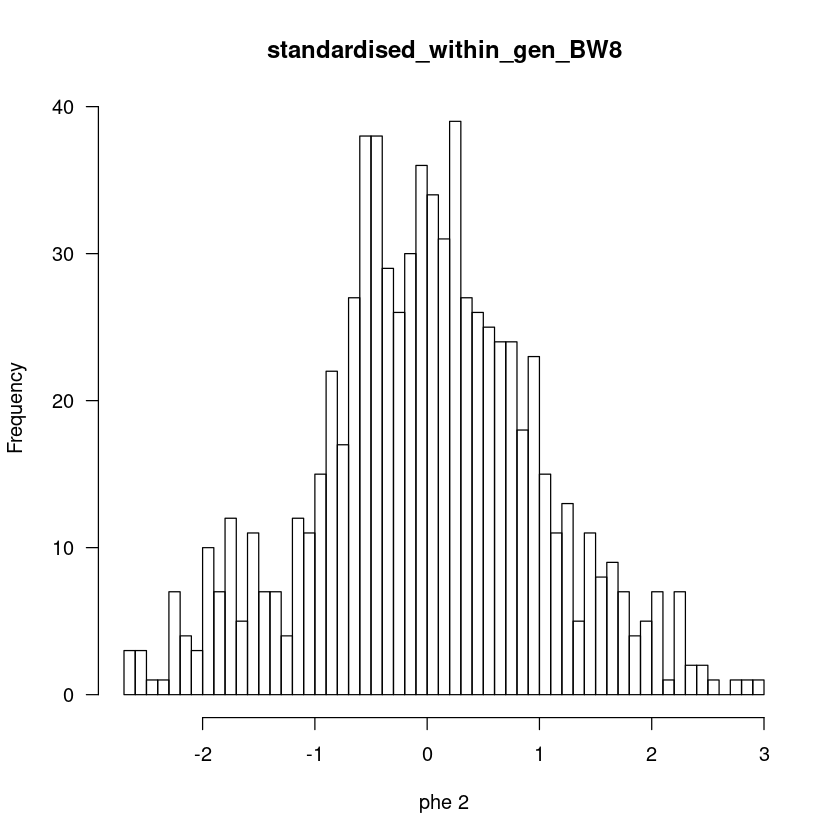

In [105]:
plotPheno(datf2.5, pheno.col = 2)

In [106]:
out.hk.AC = scanone(datf2.5, method = 'hk', addcovar =ac, pheno.col = 2)

out.hk.AC.perm = scanone(datf2.5, method = 'hk', addcovar =ac, pheno.col = 2, n.perm =1000  )

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 54 individuals with missing phenotypes.
”
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 54 individuals with missing phenotypes.
”


Permutation 20 
Permutation 40 
Permutation 60 
Permutation 80 
Permutation 100 
Permutation 120 
Permutation 140 
Permutation 160 
Permutation 180 
Permutation 200 
Permutation 220 
Permutation 240 
Permutation 260 
Permutation 280 
Permutation 300 
Permutation 320 
Permutation 340 
Permutation 360 
Permutation 380 
Permutation 400 
Permutation 420 
Permutation 440 
Permutation 460 
Permutation 480 
Permutation 500 
Permutation 520 
Permutation 540 
Permutation 560 
Permutation 580 
Permutation 600 
Permutation 620 
Permutation 640 
Permutation 660 
Permutation 680 
Permutation 700 
Permutation 720 
Permutation 740 
Permutation 760 
Permutation 780 
Permutation 800 
Permutation 820 
Permutation 840 
Permutation 860 
Permutation 880 
Permutation 900 
Permutation 920 
Permutation 940 
Permutation 960 
Permutation 980 
Permutation 1000 


In [108]:
summary(out.hk.AC.perm)

LOD thresholds (1000 permutations)
     lod
5%  4.13
10% 3.74

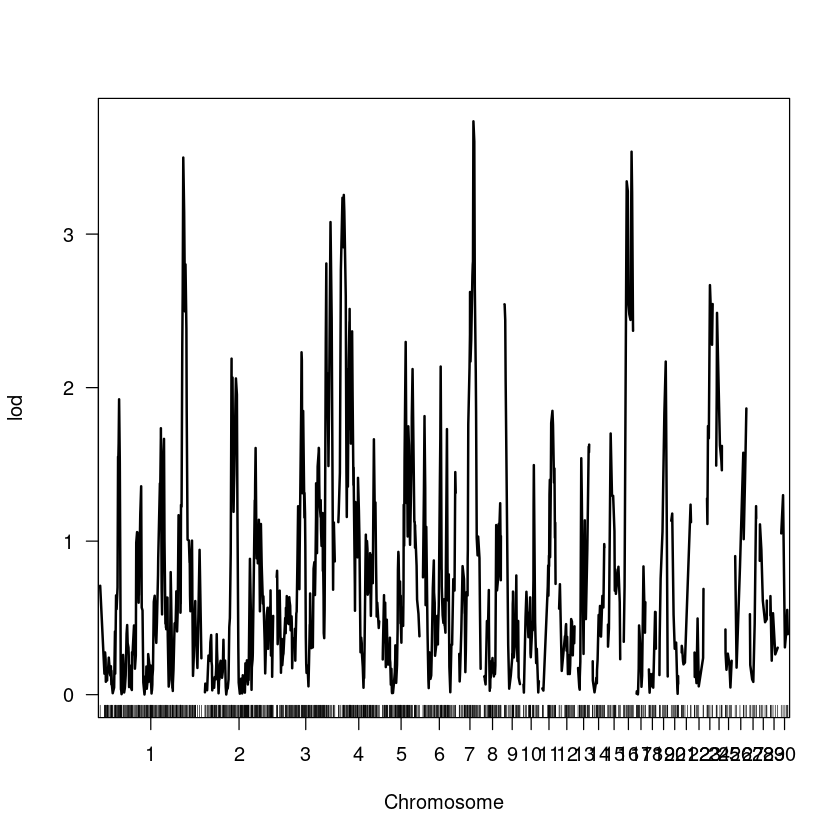

In [110]:
plot(out.hk.AC)
abline(h=4.13)


In [81]:
pos = out.hk.AC$pos[rownames(out.hk.AC) %in% markers]

In [82]:
chr = out.hk.AC$chr[rownames(out.hk.AC) %in% markers]

In [83]:
qtls <- makeqtl(datf2.5, chr = chr, pos = pos, what = 'prob' )

Warning message in getsex(cross):
“Sex column should be coded as 0=female 1=male; sex ignored.”


In [84]:
fit_sugg <- fitqtl(datf2.5, pheno.col = 2, qtl = qtls, get.ests=TRUE, covar = data.frame(ac))

Warning message in fitqtl(datf2.5, pheno.col = 2, qtl = qtls, get.ests = TRUE, covar = data.frame(ac)):
“The qtl object doesn't contain imputations; using method="hk".”
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
“Dropping 54 individuals with missing phenotypes.
”
Warning message in getsex(cross):
“Sex column should be coded as 0=female 1=male; sex ignored.”


In [85]:
summary(fit_sugg)


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 768 

Full model result
----------------------------------  
Model formula: y ~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + ac 

       df       SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model  15 178.5374 11.9024962 43.75805 23.07868            0         0
Error 752 595.0659  0.7913111                                         
Total 767 773.6034                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
        df Type III SS    LOD    %var F value Pvalue(Chi2) Pvalue(F)    
1@563.0  2      13.895  3.849  1.7962   8.780        0.000   0.00017 ***
2@338.1  2       4.658  1.300  0.6022   2.943        0.050   0.05329 .  
4@48.3   2       9.349  2.600  1.2085   5.907        0.003   0.00285 ** 
6@129.2  2       5.905  1.647  0.7633   3.731        0.023   0.02441 *  
7@77.2   2       6.437  1.794  0.8320   4.067        0